In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
from IPython.display import HTML

In [9]:
Img_size=256

In [10]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/rajan/Downloads/archive/PlantVillage",
    shuffle=True,
    image_size=(Img_size,Img_size),
    batch_size=32)

Found 2152 files belonging to 3 classes.


In [11]:
class_names=data.class_names

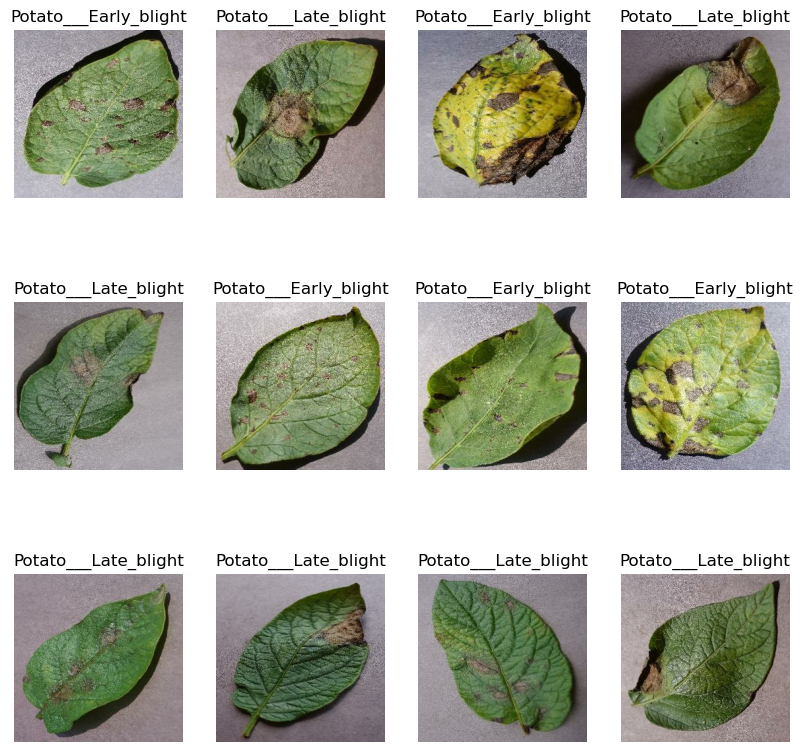

In [12]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def dataset_partition(data,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=100):
    ds=len(data)
    
    if shuffle==True:
        dataset=data.shuffle(shuffle_size,seed=10)
    
    train_per=int(train_split*ds)
    train_data=dataset.take(train_per)
    
    val_per=int(val_split*ds)
    val_data=dataset.skip(train_per).take(val_per)
    test_data=dataset.skip(train_per).skip(val_per)
    
    return train_data,val_data,test_data

In [14]:
train_data,validation_data,test_data=dataset_partition(data)

In [15]:
train_data=train_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data=validation_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)


In [16]:
resize_augment=tf.keras.models.Sequential([
    
    tf.keras.layers.experimental.preprocessing.Resizing(Img_size,Img_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(0.1/255),
    
    # let us do data augmentation
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.5),
])

In [17]:
model=tf.keras.models.Sequential([
    
    resize_augment,
    
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(256,256,3),strides=1,activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16,(2,3),strides=1,activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(8,(2,2),strides=1,activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(2,(3,3),strides=1,activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])

In [18]:
input_shape=(32,256,256,3)
model.build(input_shape)

In [19]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics='accuracy'
         )

In [20]:
history=model.fit(train_data,epochs=5,batch_size=32,validation_data=validation_data)

Epoch 1/5
54/54 [==============================] - 144s 2s/step - loss: 0.9231 - accuracy: 0.4853 - val_loss: 0.8943 - val_accuracy: 0.4479
Epoch 2/5
54/54 [==============================] - 74s 1s/step - loss: 0.9095 - accuracy: 0.4777 - val_loss: 0.8856 - val_accuracy: 0.4479
Epoch 3/5
54/54 [==============================] - 73s 1s/step - loss: 0.9056 - accuracy: 0.5029 - val_loss: 0.8742 - val_accuracy: 0.4583
Epoch 4/5
54/54 [==============================] - 74s 1s/step - loss: 0.8937 - accuracy: 0.4912 - val_loss: 0.8388 - val_accuracy: 0.5000
Epoch 5/5
54/54 [==============================] - 73s 1s/step - loss: 0.7753 - accuracy: 0.6784 - val_loss: 0.5790 - val_accuracy: 0.8073


In [21]:
history


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
val_acc=history.history["val_accuracy"]
acc=history.history["accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

In [25]:
model.evaluate(test_data)

8/8 [==============================] - 4s 305ms/step - loss: 0.5993 - accuracy: 0.8320


[0.5993223190307617, 0.83203125]

Text(0.5, 1.0, 'accuracy and Val accuracy')

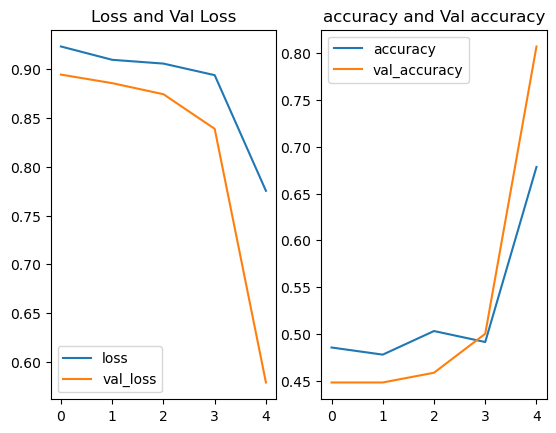

In [26]:
plt.subplot(1,2,1)
ax1=plt.plot(range(5),loss,label="loss")
ax1=plt.plot(range(5),val_loss,label="val_loss")
plt.legend()
plt.title("Loss and Val Loss")

plt.subplot(1,2,2)
ax1=plt.plot(range(5),acc,label="accuracy")
ax1=plt.plot(range(5),val_acc,label="val_accuracy")
plt.legend()
plt.title("accuracy and Val accuracy")

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = loaded_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 60ms/step


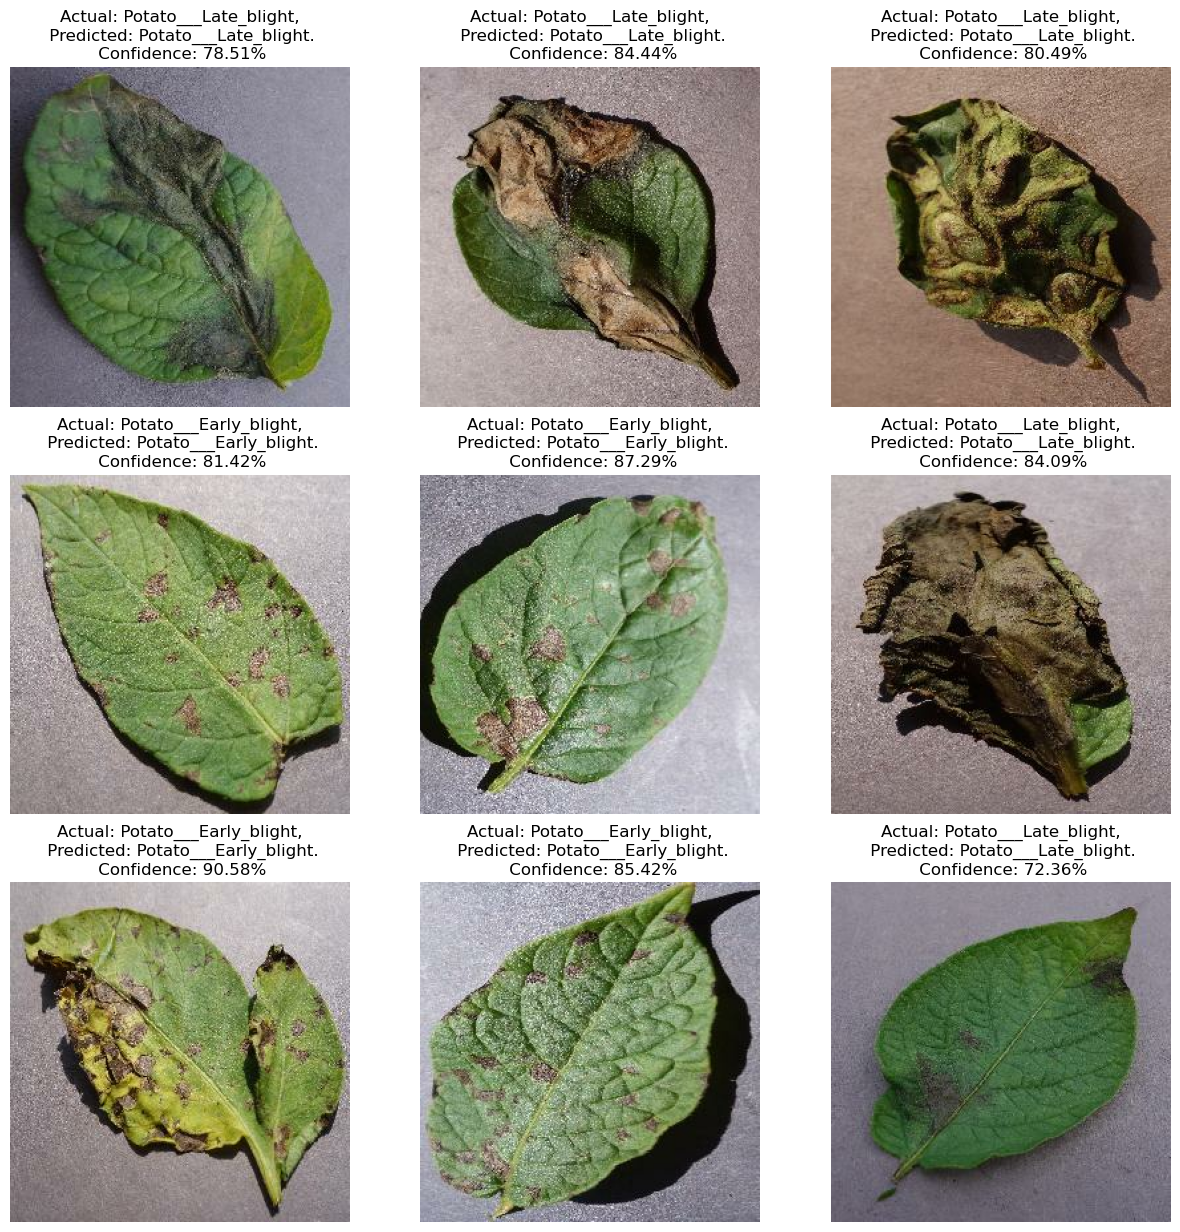

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")